<a href="https://colab.research.google.com/github/divy042000/Machine-Learning/blob/main/CSE523_Log_reg_ovo_ovr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**"ovo" and "ovr" approach with logistic regression on iris dataset.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap  # Add this import

In [ ]:
# Function to plot decision boundaries
def plot_decision_boundary(model, title,class_names):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA']))

Iris dataset

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Select the first two features for simplicity in visualization
X = X[:, :2]
# X = X[:, 2:]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

An alternative is to introduce K(K − 1)/2 binary discriminant functions, one for every possible pair of classes. This is known as a one-versus-one classifier. Each point is then classified according to a majority vote amongst the discriminant functions.

— Page 183, Pattern Recognition and Machine Learning, 2006.

In [ ]:
# Logistic Regression with One-vs-One (OvO) approach
ovo_model = OneVsOneClassifier(LogisticRegression())
ovo_model.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression())

The obvious approach is to use a one-versus-the-rest approach (also called one-vs-all), in which we train C binary classifiers, fc(x), where the data from class c is treated as positive, and the data from all the other classes is treated as negative.

— Page 503, Machine Learning: A Probabilistic Perspective, 2012

In [ ]:
# Logistic Regression with One-vs-Rest (OvR) approach
ovr_model = OneVsRestClassifier(LogisticRegression())
ovr_model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

OvO Accuracy on Test Set: 0.90
OvR Accuracy on Test Set: 0.93


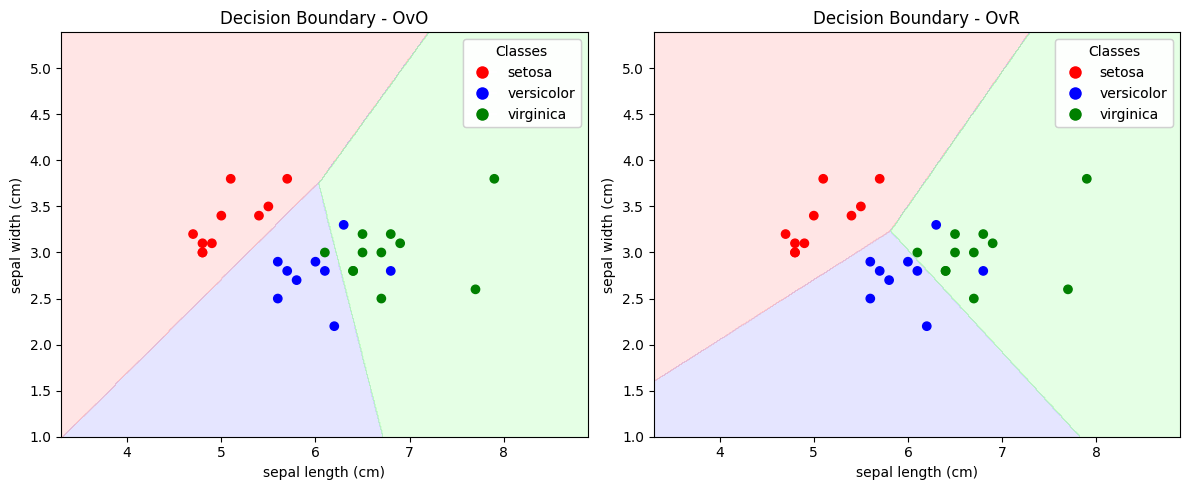

In [ ]:

# Plot decision boundaries for OvO model
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(ovo_model, 'Decision Boundary - OvO',iris.target_names)

# Plot data points
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(['red', 'blue', 'green']))
# Create handles and labels for legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in scatter.cmap.colors]
labels = iris.target_names

# Create legend
legend = plt.legend(handles, labels, title="Classes")
plt.gca().add_artist(legend)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Decision Boundary - OvO')

# Calculate accuracy on test set for OvO
ovo_predictions = ovo_model.predict(X_test)
ovo_accuracy = accuracy_score(y_test, ovo_predictions)
print(f'OvO Accuracy on Test Set: {ovo_accuracy:.2f}')

# Plot decision boundaries for OvR model
plt.subplot(1, 2, 2)
plot_decision_boundary(ovr_model, 'Decision Boundary - OvR',iris.target_names)

# Plot data points
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(['red', 'blue', 'green']))
# Create handles and labels for legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in scatter.cmap.colors]
labels = iris.target_names

# Create legend
legend = plt.legend(handles, labels, title="Classes")
plt.gca().add_artist(legend)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Decision Boundary - OvR')

# Calculate accuracy on test set for OvR
ovr_predictions = ovr_model.predict(X_test)
ovr_accuracy = accuracy_score(y_test, ovr_predictions)
print(f'OvR Accuracy on Test Set: {ovr_accuracy:.2f}')

plt.tight_layout()
plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# from sklearn import datasets
# from sklearn.inspection import DecisionBoundaryDisplay
# from sklearn.linear_model import LogisticRegression

# # import some data to play with
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.
# Y = iris.target

# # Create an instance of Logistic Regression Classifier and fit the data.
# logreg = LogisticRegression(C=1e5,multi_class="ovr")
# logreg.fit(X, Y)

# _, ax = plt.subplots(figsize=(4, 3))
# DecisionBoundaryDisplay.from_estimator(
#     logreg,
#     X,
#     cmap=plt.cm.Paired,
#     ax=ax,
#     response_method="predict",
#     plot_method="pcolormesh",
#     shading="auto",
#     xlabel="Sepal length",
#     ylabel="Sepal width",
#     eps=0.5,
# )

# # Plot also the training points
# plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


# plt.xticks(())
# plt.yticks(())

# plt.show()